### https://thecleverprogrammer.com/2020/08/20/contact-tracing-with-machine-learning/

In [1]:
import pandas as pd
import json

In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [3]:
df = pd.read_json('livedata.json')
df

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
...,...,...,...,...
95,Judy,2020-07-04 16:35:30,13.176481,77.619396
96,Bob,2020-07-04 15:35:30,13.172339,77.662080
97,Grace,2020-07-04 23:35:30,13.115079,77.697991
98,Bob,2020-07-04 19:35:30,13.180751,77.704404


In [4]:
df.isnull().sum()

id           0
timestamp    0
latitude     0
longitude    0
dtype: int64

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


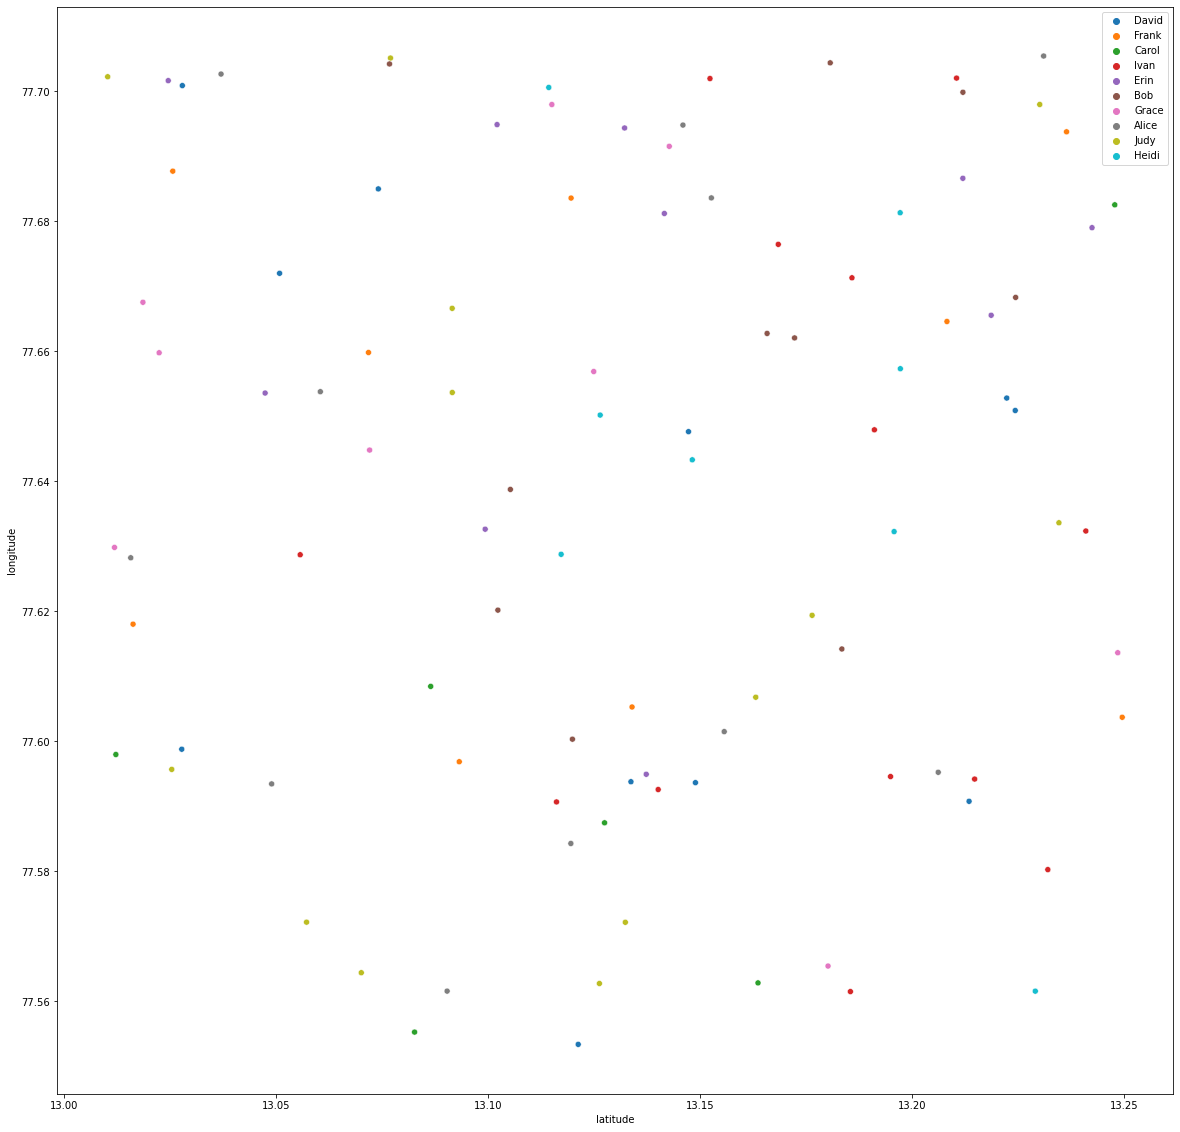

In [5]:
plt.figure(figsize=(20,20))
sns.scatterplot(df['latitude'], df['longitude'], hue=[x for x in df['id']])
plt.legend(bbox_to_anchor = [1, 1])
plt.show();

### From this above graph we can clearly see that only 2 points at top left corner are very close to each other they are bob and july. other points are very apart

In [6]:
from sklearn.cluster import DBSCAN
def get_infected_name(input_name):
    epsilon = 0.018288 # 6 feet to kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    
    cluster_id_lst = df['cluster'].unique()
    print(cluster_id_lst)
    
    infected = []
    for i in cluster_id_lst:
        if i!=-1:
            f = df[df['cluster']==i]
            names = list(f.iloc[:,0])
            for j in names:
                if j not in infected:
                    if j!=input_name:
                        infected.append(j)
    print(infected)
get_infected_name('Bob')

[ 0  1  2  3  4  5  6 -1  7  8  9 10 11 12 13 14 15 16]
['David', 'Judy', 'Ivan', 'Alice', 'Carol', 'Erin', 'Frank', 'Grace', 'Heidi']


### This is for crosscheck with manual

In [7]:
z = df[df['cluster']==0]
z

,id,timestamp,latitude,longitude,cluster
0,David,2020-07-04 15:35:30,13.148953,77.593651,0
29,Judy,2020-07-04 19:35:30,13.126296,77.562748,0
33,Ivan,2020-07-04 19:35:30,13.140162,77.592594,0
40,Judy,2020-07-04 15:35:30,13.132413,77.572169,0
41,Alice,2020-07-04 12:35:30,13.155742,77.601504,0
49,Carol,2020-07-04 19:35:30,13.127510,77.587472,0
51,Erin,2020-07-04 13:35:30,13.137346,77.594941,0
62,Bob,2020-07-04 16:35:30,13.183498,77.614218,0
63,Judy,2020-07-04 14:35:30,13.163183,77.606797,0
79,Bob,2020-07-04 23:35:30,13.119932,77.600342,0


In [8]:
lat =  z.iloc[0,2]-z.iloc[1,2]
long = z.iloc[0,3]-z.iloc[1,3]

In [9]:
import numpy as np
np.sqrt((lat*lat)+(long*long))

0.03831867753067574